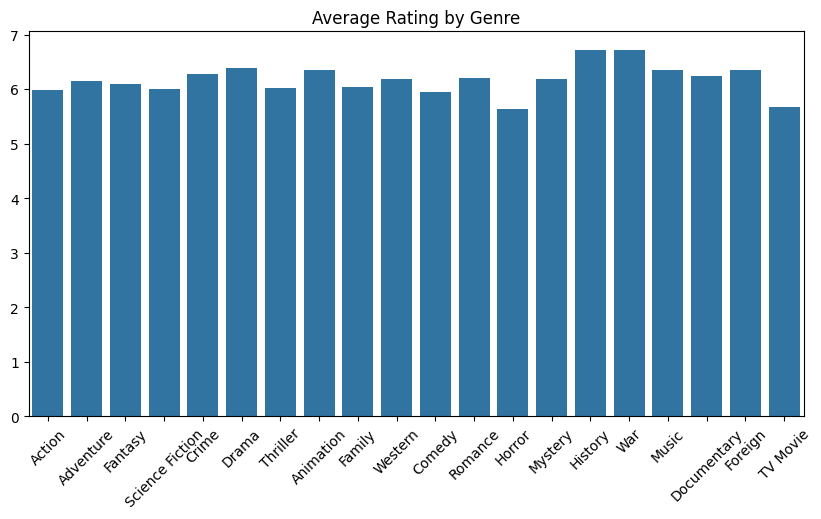

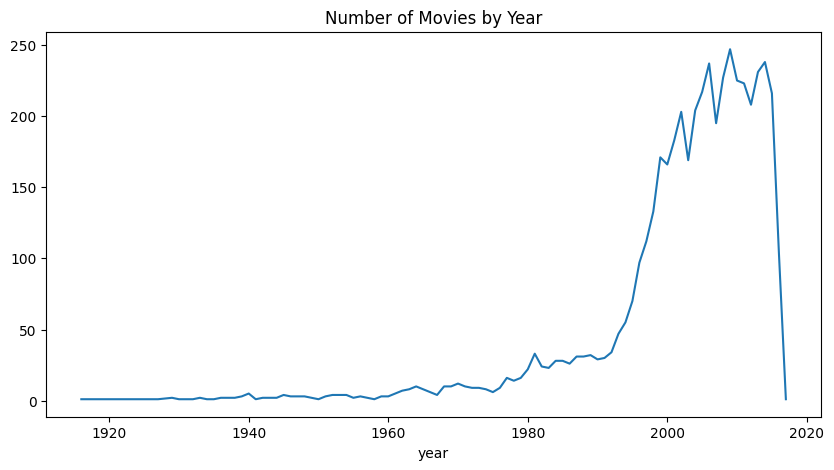

In [1]:
# movie_analysis.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# 1. 데이터 불러오기
df = pd.read_csv('data/tmdb_5000_movies.csv')

# 2. 결측치 제거
df = df.dropna(subset=['genres', 'vote_average', 'release_date'])

# 3. 장르 데이터 파싱
def extract_genres(genre_str):
    genres = ast.literal_eval(genre_str)
    return [g['name'] for g in genres]

df['genres_list'] = df['genres'].apply(extract_genres)

# 4. 개봉년도 추출
df['year'] = pd.to_datetime(df['release_date']).dt.year

# 5. 장르별 평균 평점
genre_ratings = {}
for idx, row in df.iterrows():
    for genre in row['genres_list']:
        genre_ratings.setdefault(genre, []).append(row['vote_average'])
genre_ratings = {g: sum(vals)/len(vals) for g, vals in genre_ratings.items()}

# 6. 시각화 - 장르별 평균 평점
plt.figure(figsize=(10,5))
sns.barplot(x=list(genre_ratings.keys()), y=list(genre_ratings.values()))
plt.xticks(rotation=45)
plt.title('Average Rating by Genre')
plt.savefig('output/genre_ratings.png')
plt.show()

# 7. 연도별 영화 제작 수
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Number of Movies by Year')
plt.savefig('output/yearly_counts.png')
plt.show()
